## Instructions

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Please see the [module book](https://moody.st-andrews.ac.uk/moodle/mod/resource/view.php?id=950238) for full instructions on completing your tutorial work.

Make sure you *only* fill in places that say `YOUR CODE HERE` or "YOUR ANSWER HERE". Replace the contents of those cells only, changing other cells may prevent grading.

When using matplotlib please make sure to use the inline option (not notebook) to allow grading: 
`%matplotlib inline`



---

<font size="4" color=#2e2a7f>

# Tutorial 4: The Graham scan algorithm
   
----
    
**Before attempting this tutorial please watch the accompanying [video](https://st-andrews.cloud.panopto.eu/Panopto/Pages/Viewer.aspx?id=ef11244d-104d-4faf-be36-af9400d86615) on the Graham scan algorithm where the method is discussed and a pseudocode is provided.**
    
    
**Please do not be tempted to use code found online or copy from a classmate; we will be running all notebooks through plagiarism detection software and will easily identify copied work.**
    
----
    
Create, from scratch, your own version of the Graham scan algorithm for computing the convex hull. Your code should be in the form of a function `get_hull(points)` which takes as argument a $2\times N$ array of point coordinate pairs $(x,y)$ and returns the subset of those points which would make up the vertices of the convex hull.
    
The function should be tested by the following
    
```python
points = np.random.rand(2,N)
hull = get_hull(points)

plt.plot(points[0,:],points[1,:],'.')
plt.plot(np.append(hull[0,:],hull[0,0]),np.append(hull[1,:],hull[1,0])) 
    # append is used to close the hull
plt.show()    
```
    
and will be tested against several different arrays of points for grading. Marks out of 10 including 3 marks for good programming practise (e.g. use of comments, functions, readability etc).
    
Note, as described in the video, your hull must begin with the point with lowest $y$ coordinate. Your function should take a $2\times N$ `numpy` array as input and return a $2\times M$ `numpy` array, where $M$ is the size of the hull.
    
Credit will be awarded via the following tests:
    
* The returned variable (`hull` above) is of the correct `type` (same as `points` above).
* The returned array has the correct size and shape.
* The trivial hull of 3 points is returned.
* The correct subset of points is recovered for any N.

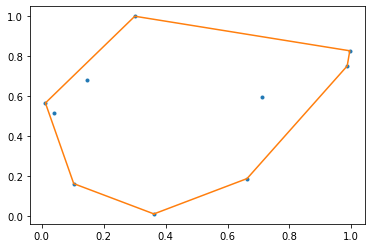

In [1]:
# your code goes here
import numpy as np 
from matplotlib import pyplot as plt

N = 10
points = np.random.rand(2,N)

# Create a method det, input with three points in [x,y] form
# if their vector product is positive, it identify a left turn
def cross_product(point1, point2, point3):
    x1, y1 = point1
    x2, y2 = point2
    x3, y3 = point3
    return (x2 - x1) * (y3 - y1) - (x3 - x1) * (y2 - y1)


# The get_hulll method which accept a 2*N matrix input 
def get_hull(points):
    # Find the Min y to start with 
    min_index = np.argmin(points[1,:])
    # Transpose 'points' into N * 2 matrix, points ordered as (x,y)
    data = np.transpose(points)
    # The lowest y point 'start' to start with 
    start = data[min_index]
    inverse_gradient = []
    # Coordinates of starting point
    x_val = points[0,min_index]
    y_val = points[1,min_index]

    for i in range (N):
        y_distance = (points[1,i]-y_val)
        # the starting point and itself -- avoid divided by zero
        if y_distance == 0: y_distance = 1
        val = ((points[0,i]-x_val)/(y_distance))
        # Append the list with x,y coordinates of the point and their inverse_gradient 
        inverse_gradient.append([points[0,i],points[1,i],val])
    
    inverse_gradient = np.array(inverse_gradient)
    # sorts the data based on 'inverse_gradient' column 
    # slices the data to retain only [x,y],i.e the first two columns 
    sorted_data = inverse_gradient[inverse_gradient[:, 2].argsort()][:, :2]
    # initializes the convex hull with two points
    convex_hull = [start, sorted_data[0]]

        
    for curr_point in sorted_data[1:]:
        # length check of trivial hull of at least three point && identify left turn 
        while len(convex_hull) >= 3 and cross_product(convex_hull[-2], convex_hull[-1], curr_point) > 0:
            convex_hull.pop()
        convex_hull.append(curr_point)

    # Convert it back to the 2*M format 
    hull = np.transpose(convex_hull)
    
    plt.plot(points[0,:],points[1,:],'.')
    plt.plot(np.append(hull[0,:],hull[0,0]),np.append(hull[1,:],hull[1,0])) 
    # append is used to close the hull
    plt.show() 

get_hull(points)

In [2]:
# Don't edit this cell

if not "get_hull" in globals():
    raise NotImplementedError("get_hull has not been defined")
